# Import libraries

In [ ]:
import numpy as np        # To perform the Mathematical operation
import pandas as pd       # Data Manipulation tool

# Data Visualisation tool
import matplotlib.pyplot as plt       
import seaborn as sns                 

# To check accuracy
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error

# For encoding and scaling 
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler

# train_test_split <- divide train and test set
# GridSearchCV <- classifier hyper parameter tunning 
from sklearn.model_selection import train_test_split, GridSearchCV

# Regression methods 
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV, LinearRegression

# Import dataset

In [ ]:
df = pd.read_csv('/content/AppleStore (1).csv')
df.head()

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1


## Description of the dataset

1. "id" : App ID

2. "track_name": App Name

3. "size_bytes": Size (in Bytes)

4. "currency": Currency Type

5. "price": Price amount

6. "ratingcounttot": User Rating counts (for all version)

7. "ratingcountver": User Rating counts (for current version)

8. "user_rating" : Average User Rating value (for all version)

9. "userratingver": Average User Rating value (for current version)

10. "ver" : Latest version code

11. "cont_rating": Content Rating

12. "prime_genre": Primary Genre

13. "sup_devices.num": Number of supporting devices

14. "ipadSc_urls.num": Number of screenshots showed for display

15. "lang.num": Number of supported languages

16. "vpp_lic": Vpp Device Based Licensing Enabled

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7197 entries, 0 to 7196
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        7197 non-null   int64  
 1   id                7197 non-null   int64  
 2   track_name        7197 non-null   object 
 3   size_bytes        7197 non-null   int64  
 4   currency          7197 non-null   object 
 5   price             7197 non-null   float64
 6   rating_count_tot  7197 non-null   int64  
 7   rating_count_ver  7197 non-null   int64  
 8   user_rating       7197 non-null   float64
 9   user_rating_ver   7197 non-null   float64
 10  ver               7197 non-null   object 
 11  cont_rating       7197 non-null   object 
 12  prime_genre       7197 non-null   object 
 13  sup_devices.num   7197 non-null   int64  
 14  ipadSc_urls.num   7197 non-null   int64  
 15  lang.num          7197 non-null   int64  
 16  vpp_lic           7197 non-null   int64  


In [ ]:
df.isnull().sum()

Unnamed: 0          0
id                  0
track_name          0
size_bytes          0
currency            0
price               0
rating_count_tot    0
rating_count_ver    0
user_rating         0
user_rating_ver     0
ver                 0
cont_rating         0
prime_genre         0
sup_devices.num     0
ipadSc_urls.num     0
lang.num            0
vpp_lic             0
dtype: int64

**No NULL values**

In [ ]:
df.duplicated().sum()

0

**No duplicates**

In [ ]:
df.currency.value_counts()

USD    7197
Name: currency, dtype: int64

**Currency is same in all data rows.**

**id is not necessary for the analysis.**

**Therefore, 3 rows can be dropped.**

In [ ]:
df.drop(['Unnamed: 0', 'id', 'currency'], axis=1, inplace = True)

In [ ]:
df.head()

,track_name,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,PAC-MAN Premium,100788224,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,Evernote - stay organized,158578688,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,Bible,92774400,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1


##Creating random column

**by creating a new random column.**

In [ ]:
import random
df1 = df.copy()
np.random.seed(42)
df1['random_col'] = np.random.uniform(0, 1, len(df1)) <= 0.8    # 80% True 
df1.head()

,track_name,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,random_col
0,PAC-MAN Premium,100788224,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1,True
1,Evernote - stay organized,158578688,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1,False
2,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1,True
3,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1,True
4,Bible,92774400,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1,True


In [ ]:
df1.random_col.value_counts()

True     5755
False    1442
Name: random_col, dtype: int64

# Train Test split

In [ ]:
df2 = df1.copy()
train, test = df2[df2['random_col'] == True], df2[df2['random_col'] == False]

In [ ]:
train.shape

(5755, 15)

In [ ]:
test.shape

(1442, 15)

In [ ]:
train.drop('random_col', axis=1, inplace=True)
test.drop('random_col', axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


# Descriptive analysis

##Univariate analysis

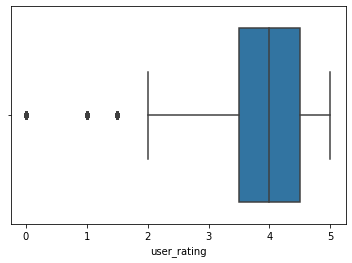

In [ ]:
sns.boxplot(x=train['user_rating'])

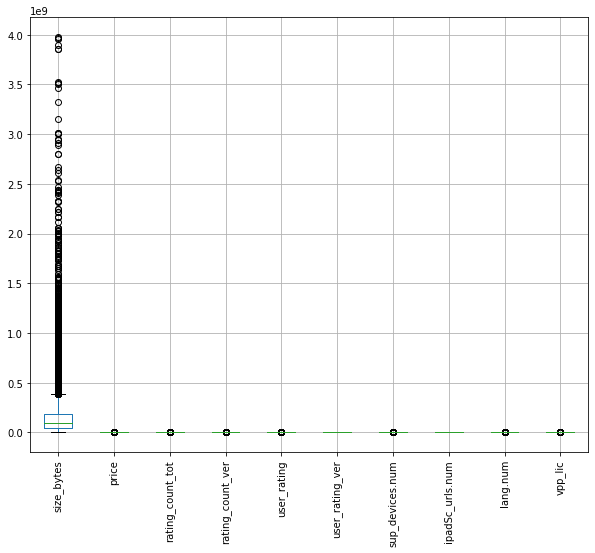

In [ ]:
plt.figure(figsize=(10, 8))
train.boxplot()
plt.tick_params(axis='x', rotation=90)

##Bivariate analysis

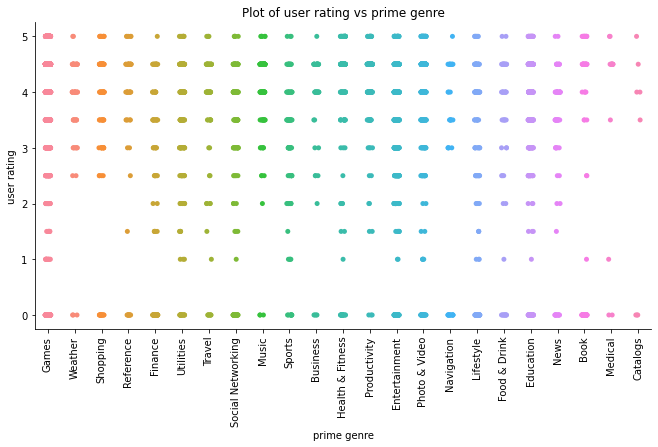

In [ ]:
sns.catplot(x="prime_genre", y="user_rating", data=train, height=5, aspect=15/8)
plt.title('Plot of user rating vs prime genre')
plt.xlabel('prime genre')
plt.ylabel('user rating')
plt.tick_params(axis='x', rotation=90)

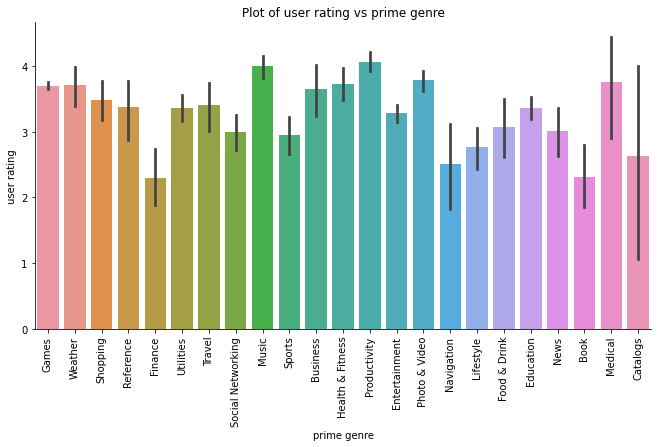

In [ ]:
sns.catplot(x="prime_genre", y="user_rating", data=train, height=5, aspect=15/8,
            kind='bar')
plt.title('Plot of user rating vs prime genre')
plt.xlabel('prime genre')
plt.ylabel('user rating')
plt.tick_params(axis='x', rotation=90)

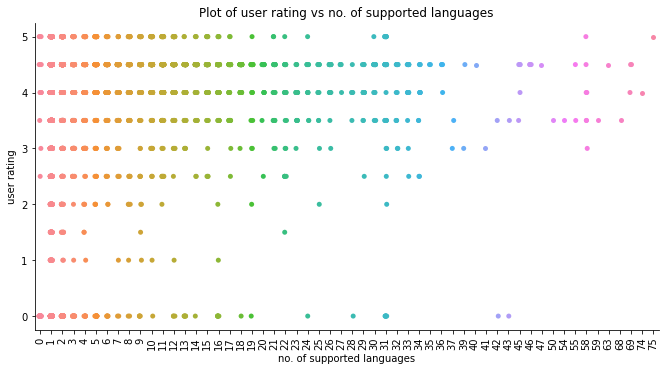

In [ ]:
sns.catplot(x='lang.num', y="user_rating", data=train, height=5, aspect=15/8)
plt.title('Plot of user rating vs no. of supported languages')
plt.xlabel('no. of supported languages')
plt.ylabel('user rating')
plt.tick_params(axis='x', rotation=90)

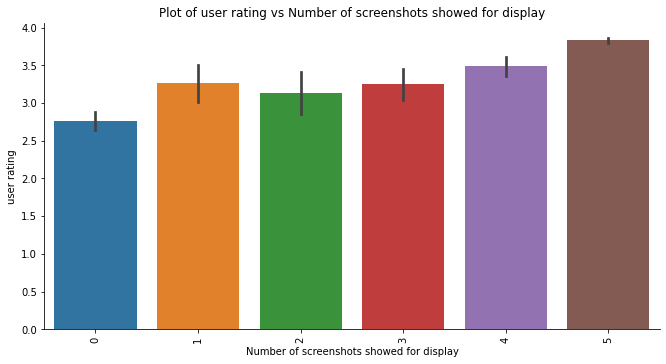

In [ ]:
sns.catplot(x="ipadSc_urls.num", y="user_rating", data=train, height=5, aspect=15/8, kind='bar')
plt.title('Plot of user rating vs Number of screenshots showed for display')
plt.xlabel('Number of screenshots showed for display')
plt.ylabel('user rating')
plt.tick_params(axis='x', rotation=90)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


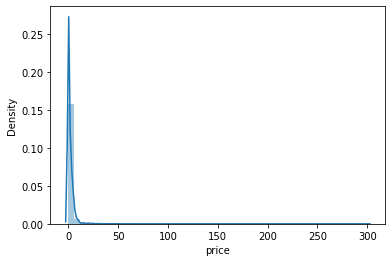

In [ ]:
sns.distplot(train.price)

In [ ]:
free_apps = train[(train.price==0.00)]
paid_apps  = train[(train.price>0)]

In [ ]:
Top_paid_Apps = paid_apps[paid_apps.price>30][['track_name','price','prime_genre','user_rating']]
Top_paid_Apps

,track_name,price,prime_genre,user_rating
162,NAVIGON Europe,74.99,Navigation,3.5
778,プチ・ロワイヤル仏和辞典（第4版）・和仏辞典（第3版）,47.99,Reference,0.0
1479,LAMP Words For Life,299.99,Education,4.0
1688,Cubasis 2 - Mobile Music Creation System,49.99,Music,4.0
2181,Articulation Test Center Pro,59.99,Education,4.5
2405,KORG Gadget,39.99,Music,4.5
3012,Anatomy & Physiology: Body Structures and Func...,34.99,Medical,4.5
3238,FineScanner Pro - PDF Document Scanner App + OCR,59.99,Business,4.0


In [ ]:
free_apps.user_rating.value_counts()

4.5    1182
4.0     683
0.0     528
3.5     286
5.0     205
3.0     170
2.5      99
2.0      51
1.5      21
1.0      20
Name: user_rating, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of free apps user rating')

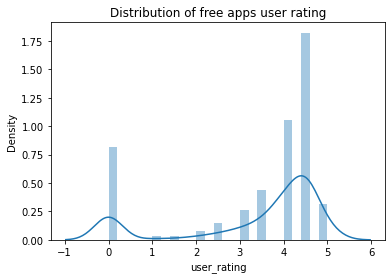

In [ ]:
sns.distplot(free_apps.user_rating)
plt.title('Distribution of free apps user rating')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of paid apps user rating')

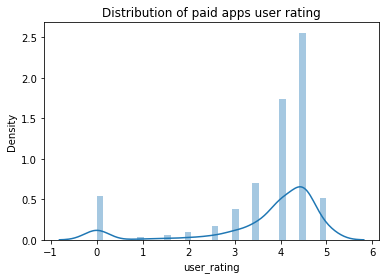

In [ ]:
sns.distplot(paid_apps.user_rating)
plt.title('Distribution of paid apps user rating')

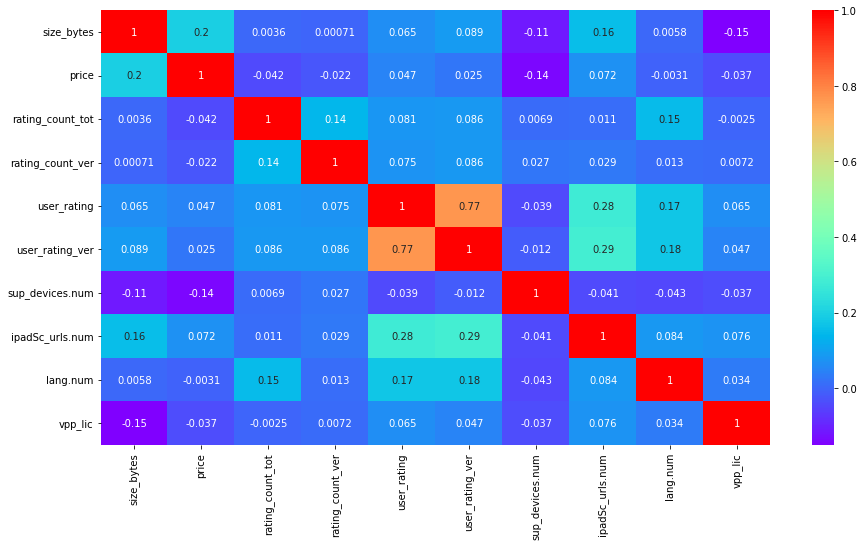

In [ ]:
# use train dataset instead of train2 
plt.figure(figsize = (15,8))
sns.heatmap(train.corr(),cmap='rainbow',annot=True)

In [ ]:
# sns.pairplot(train ,hue='vpp_lic',palette='rainbow')

In [ ]:
# train['ipadSc_urls.num'].value_counts()